In [1]:
%load_ext autoreload
%autoreload 2

%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


El sistema no puede encontrar la ruta especificada.


In [2]:
import sys
import pickle

# Se agrega el path para poder importar los modulos locales
if "../" not in sys.path:
    sys.path.append("../")

import pandas as pd

import xgboost as xg
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from utils import one_hot_encode

import shap

d:\anaconda3\envs\ame{{environment}}\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
X = pd.read_parquet("data/variables.parquet")
y = pd.read_parquet("../../resources/flights_clean.parquet")["Passengers"]

In [4]:
train_x, test_x, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

eval_set = [(test_x, test_y)]

train_dmatrix = xg.DMatrix(data=train_x, label=train_y)
test_dmatrix = xg.DMatrix(data=test_x, label=test_y)

# xgb_r = XGBRegressor(n_estimators=10, seed=123)
xgb_r = XGBRegressor(learning_rate=0.5, n_estimators=250)
xgb_r.fit(train_x, train_y, eval_set=eval_set, verbose=True)
y_pred = xgb_r.predict(test_x)

[0]	validation_0-rmse:31.26254
[1]	validation_0-rmse:29.13348
[2]	validation_0-rmse:28.01218
[3]	validation_0-rmse:27.40918
[4]	validation_0-rmse:26.87916
[5]	validation_0-rmse:26.67104
[6]	validation_0-rmse:26.35758
[7]	validation_0-rmse:26.17365
[8]	validation_0-rmse:25.80083
[9]	validation_0-rmse:25.64590
[10]	validation_0-rmse:25.31631
[11]	validation_0-rmse:25.08036
[12]	validation_0-rmse:24.85542
[13]	validation_0-rmse:24.64159
[14]	validation_0-rmse:24.58612
[15]	validation_0-rmse:24.35291
[16]	validation_0-rmse:24.29455
[17]	validation_0-rmse:24.25437
[18]	validation_0-rmse:24.17797
[19]	validation_0-rmse:24.10583
[20]	validation_0-rmse:24.01072
[21]	validation_0-rmse:23.96712
[22]	validation_0-rmse:23.87907
[23]	validation_0-rmse:23.83516
[24]	validation_0-rmse:23.76784
[25]	validation_0-rmse:23.74237
[26]	validation_0-rmse:23.60059
[27]	validation_0-rmse:23.47534
[28]	validation_0-rmse:23.44612
[29]	validation_0-rmse:23.33170
[30]	validation_0-rmse:23.29483
[31]	validation_0-

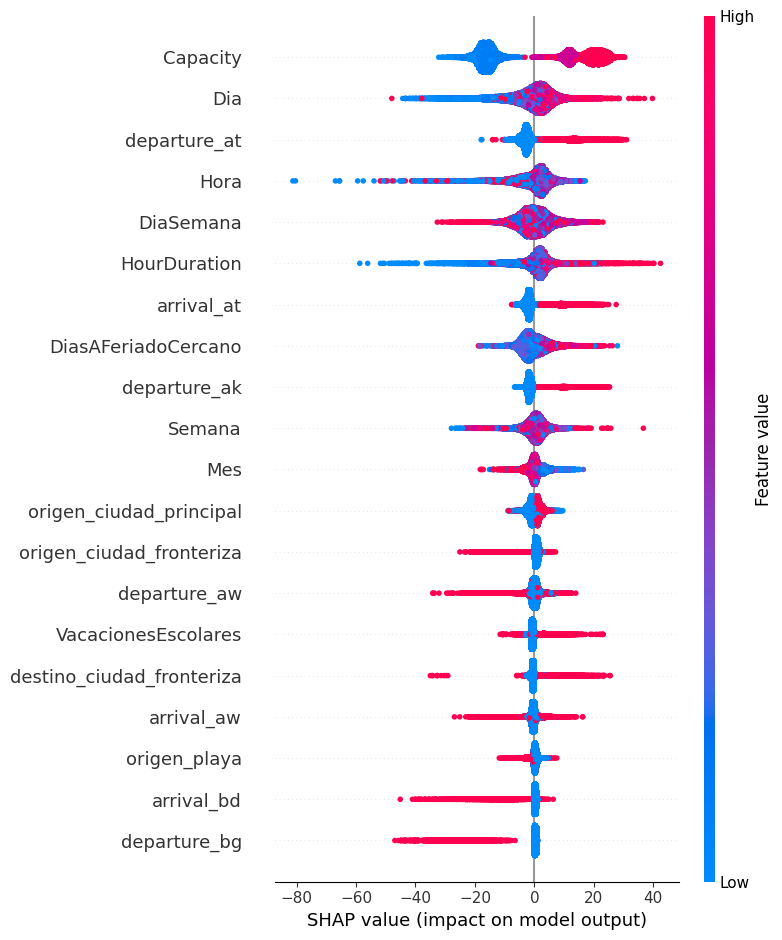

In [5]:
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(train_x)
shap.summary_plot(shap_values, train_x)

In [6]:
pickle.dump(xgb_r, open("models/xgb_pasajeros_model.pickle", "wb"))